In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_energy_rolling
from models.energy.energy_models import energy_baseline,energy_LSTM, energy_XGBoost, energy_quantile_regression

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:33<00:00,  8.29it/s]


{'2022-05-26', '2021-05-01', '2022-04-15', '2022-04-18', '2022-12-25', '2022-12-26', '2022-10-03', '2024-05-01', '2024-04-01', '2021-05-24', '2024-05-20', '2022-05-01', '2024-12-26', '2024-12-25', '2024-01-01', '2021-05-13', '2021-12-25', '2021-04-02', '2023-01-01', '2024-10-03', '2023-12-26', '2023-10-03', '2023-04-07', '2022-01-01', '2021-10-03', '2024-03-29', '2023-05-18', '2021-04-05', '2023-05-29', '2023-12-25', '2022-06-06', '2024-05-09', '2021-01-01', '2021-12-26', '2023-05-01', '2023-04-10'}


In [3]:
energy

,gesamt,weekday
date_time,,
2021-01-02 00:00:00,42.99900,5
2021-01-02 01:00:00,41.20325,5
2021-01-02 02:00:00,40.22650,5
2021-01-02 03:00:00,40.09550,5
2021-01-02 04:00:00,40.74400,5
...,...,...
2024-03-21 07:00:00,59.24175,3
2024-03-21 08:00:00,61.74775,3
2024-03-21 09:00:00,62.56575,3


In [4]:
baseline_model = {
    'name': 'Energy Baseline',
    'function': energy_baseline
}
XGB_model = {
    'name': 'Energy Extreme Gradient Boosting',
    'function': energy_XGBoost
}


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

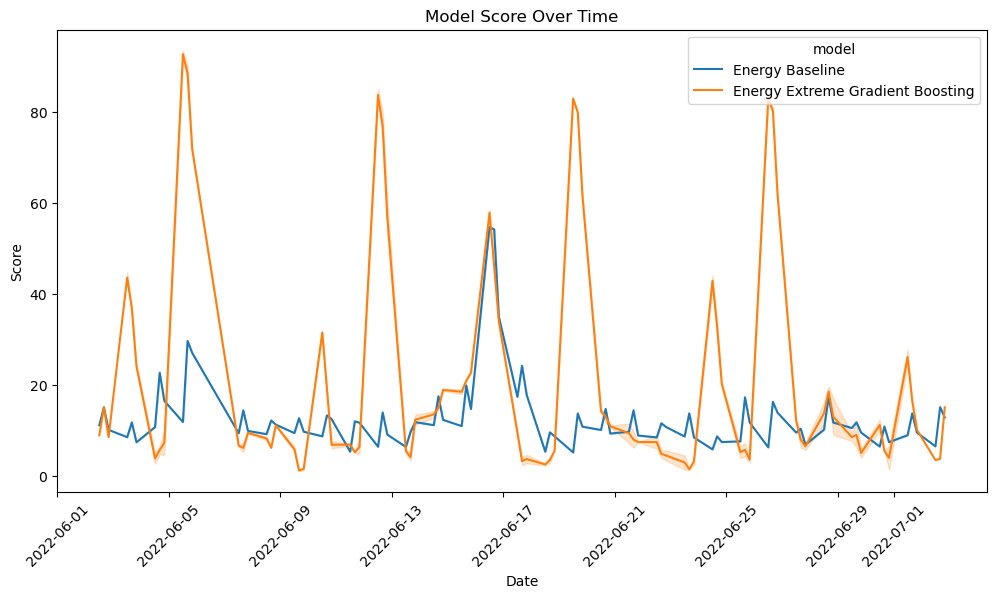

In [6]:
start_date = '2022-06-01'
end_date = '2022-06-30'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_energy_rolling.evaluate(baseline_model, XGB_model, energy, start_date, end_date, horizon_format="hours")

In [15]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,58.871450,64.338313,67.069375,70.449875,76.481887,2022-02-02 12:00:00+01:00,75.29250,2,21.844678,Energy QuantReg
1,2022-02-01,energy,40 hour,56.608094,61.109188,63.621000,69.932375,77.224275,2022-02-02 16:00:00+01:00,71.12125,2,15.320403,Energy QuantReg
2,2022-02-01,energy,44 hour,52.647250,55.703000,58.693500,62.766688,66.638238,2022-02-02 20:00:00+01:00,68.11000,2,27.278043,Energy QuantReg
3,2022-02-01,energy,60 hour,53.336875,64.185937,66.551875,70.590625,75.597156,2022-02-03 12:00:00+01:00,74.92050,3,21.343733,Energy QuantReg
4,2022-02-01,energy,64 hour,52.647975,60.605625,63.577375,69.725625,77.007975,2022-02-03 16:00:00+01:00,71.17800,3,16.283375,Energy QuantReg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-28,energy,40 hour,57.178488,60.859000,64.102625,70.016000,76.168200,2022-03-01 16:00:00+01:00,65.02450,1,6.449861,Energy QuantReg
2,2022-02-28,energy,44 hour,52.429575,55.995562,58.529500,62.825312,66.837662,2022-03-01 20:00:00+01:00,65.41250,1,16.192654,Energy QuantReg
3,2022-02-28,energy,60 hour,58.871450,64.493062,67.516250,70.509375,76.481887,2022-03-02 12:00:00+01:00,70.40650,2,6.778928,Energy QuantReg
4,2022-02-28,energy,64 hour,56.608094,61.181875,64.000875,70.108313,77.224275,2022-03-02 16:00:00+01:00,65.13800,2,6.631153,Energy QuantReg


In [16]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-01,energy,36 hour,65.448044,71.206062,72.445488,73.031723,75.382225,2022-02-02 12:00:00+01:00,75.29250,2,8.778105,Energy XGBoost
1,2022-02-01,energy,40 hour,64.157097,68.313805,69.347115,70.080284,74.593872,2022-02-02 16:00:00+01:00,71.12125,2,5.261146,Energy XGBoost
2,2022-02-01,energy,44 hour,63.774014,66.684387,67.658012,67.982956,70.468414,2022-02-02 20:00:00+01:00,68.11000,2,1.690080,Energy XGBoost
3,2022-02-01,energy,60 hour,65.313957,70.946609,72.225136,74.281830,76.319695,2022-02-03 12:00:00+01:00,74.92050,3,6.190602,Energy XGBoost
4,2022-02-01,energy,64 hour,63.243423,66.743797,67.995773,70.487869,73.482796,2022-02-03 16:00:00+01:00,71.17800,3,6.946493,Energy XGBoost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2022-02-28,energy,40 hour,63.745224,64.499771,66.304451,67.216721,72.649429,2022-03-01 16:00:00+01:00,65.02450,1,3.083636,Energy XGBoost
2,2022-02-28,energy,44 hour,63.394623,64.320656,65.446976,66.203415,68.659554,2022-03-01 20:00:00+01:00,65.41250,1,1.239102,Energy XGBoost
3,2022-02-28,energy,60 hour,65.865852,69.545296,69.688866,70.824203,73.785645,2022-03-02 12:00:00+01:00,70.40650,2,1.753078,Energy XGBoost
4,2022-02-28,energy,64 hour,63.633789,65.548256,65.964058,66.295151,71.823410,2022-03-02 16:00:00+01:00,65.13800,2,2.429498,Energy XGBoost


In [17]:
evaluation_model1['score'].sum()

3346.730364375

In [18]:
evaluation_model2['score'].sum()

3276.5202603988646

In [28]:
import pandas as pd

In [39]:
# group scores of model 1 by weekday
evaluation_model1[['score','weekday']].groupby('weekday').sum()

,score
weekday,
0,463.748962
1,524.757499
2,578.349836
3,591.819612
4,484.631300
5,420.419648
6,372.537638


In [40]:
evaluation_model2[['score','weekday']].groupby('weekday').sum()

,score
weekday,
0,100.801588
1,239.683672
2,138.325447
3,399.529417
4,1247.019787
5,504.231561
6,1183.512317
